### –û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞–Ω–∏—è

–ü—Ä–∏–±–ª–∏–∑–∏—Ç—å —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π –∏ –Ω–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π —Ä—è–¥—ã –º–æ–¥–µ–ª—è–º–∏ –∏–∑ –∫–ª–∞—Å—Å–∞ Moving Average.
–û–±–æ—Å–Ω–æ–≤–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ –≤—ã–±–æ—Ä–∞ –º–æ–¥–µ–ª–µ–π –¥–ª—è —Ä—è–¥–æ–≤ –∏ –æ—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

–ò–∑ –ø—Ä–æ—à–ª–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞ [Introducing_in_time_series](../1_Introducing_in_time_series/introducing_in_time_series.ipynb) –≤—ã–±–µ—Ä–µ–º –æ–¥–∏–Ω —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –∏ –æ–¥–∏–Ω –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π —Å —Ç—Ä–µ–Ω–¥–æ–º –∏ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é. 

In [2]:
airlines_passengers = pd.read_csv('../Data/international-airline-passengers.csv')
female_births = pd.read_csv('../Data/daily-total-female-births-in-cal.csv')

**–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:**
- airlines_passengers - International airline passengers: monthly totals in thousands: –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ —Å —Ç—Ä–µ–Ω–¥–æ–º —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å—é
- female_births - Daily total female births in California: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥

### –ù–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

In [26]:
# Functions for Holt-Winters' Model
def init_trend(data, season_len):
    """Initial trend"""
    return sum([float(data[season_len] - data[0]) / season_len]) / season_len

def init_seasonal_components(data, slen):
    """Initial seasonal components"""
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data) / slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen]) / float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen * j + i] - season_averages[j]
        seasonals[i] = sum_of_vals_over_avg / n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, n_preds):
    """Holt-Winters' Model"""
    result = []
    seasonals = init_seasonal_components(data, slen)
    for i in range(len(data) + n_preds):
        if i == 0: # initial values
            smooth = data[0]
            trend = init_trend(data, slen)
            result.append(data[0])
            continue
        if i >= len(data): # we are forecasting
            m = i - len(data) + 1
            result.append((smooth + m * trend) + seasonals[i % slen])
        else:
            val = data[i]
            last_smooth, smooth = smooth, alpha * (val - seasonals[i % slen]) + (1 - alpha) * (smooth + trend)
            trend = beta * (smooth-last_smooth) + (1 - beta) * trend
            seasonals[i % slen] = gamma * (val - smooth) + (1 - gamma) * seasonals[i % slen]
            result.append(smooth + trend + seasonals[i % slen])
    return result

def plot_tema(alpha, beta, gamma, data, n_preds=24):
    """Make plot with predict"""
    tema = triple_exponential_smoothing(data, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(data, color='blue', label='original')
        plt.plot(tema, color='red', linewidth='2', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()
        plt.show()

def mse_hwm(X, train, test):
    """Return mean squared error for Holt-Winters' Model"""
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

# Functions for Moving average
def moving_average(data, n):
    """Moving average"""
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    return data.rolling(n).mean()

def mse_ma(train, test, n):
    """Return mean squared error for Exponential moving average"""
    result = moving_average(train, n)
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error


# Functions for Exponential moving average
def exponential_moving_average(series, alpha):
    """Exponential moving average"""
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

def mse_emv(train, test):
    """Return mean squared error for Exponential moving average"""
    result = exponential_moving_average(train, alpha=0.9)
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error



### –ü—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–≥–æ —Ä—è–¥–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ International airline passengers: monthly totals in thousands

In [4]:
data = airlines_passengers['Count']

In [5]:
train, test = data[:110], data[110:]

–¢–∞–∫ –∫–∞–∫ –¥–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –∏ —Ç—Ä–µ–Ω–¥, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–¥–æ–π–¥—ë—Ç –µ–º—É –±—É–¥–µ—Ç —Ç—Ä–æ–π–Ω–æ–µ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ.
–í—ã–±–µ—Ä–µ–º –ø—Ä–æ–∏–∑–≤–æ–¥—å–Ω—ã–µ alpha, beta –∏ gamma –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

In [6]:
alpha, beta, gamma = 0.1, 0.1, 0.2

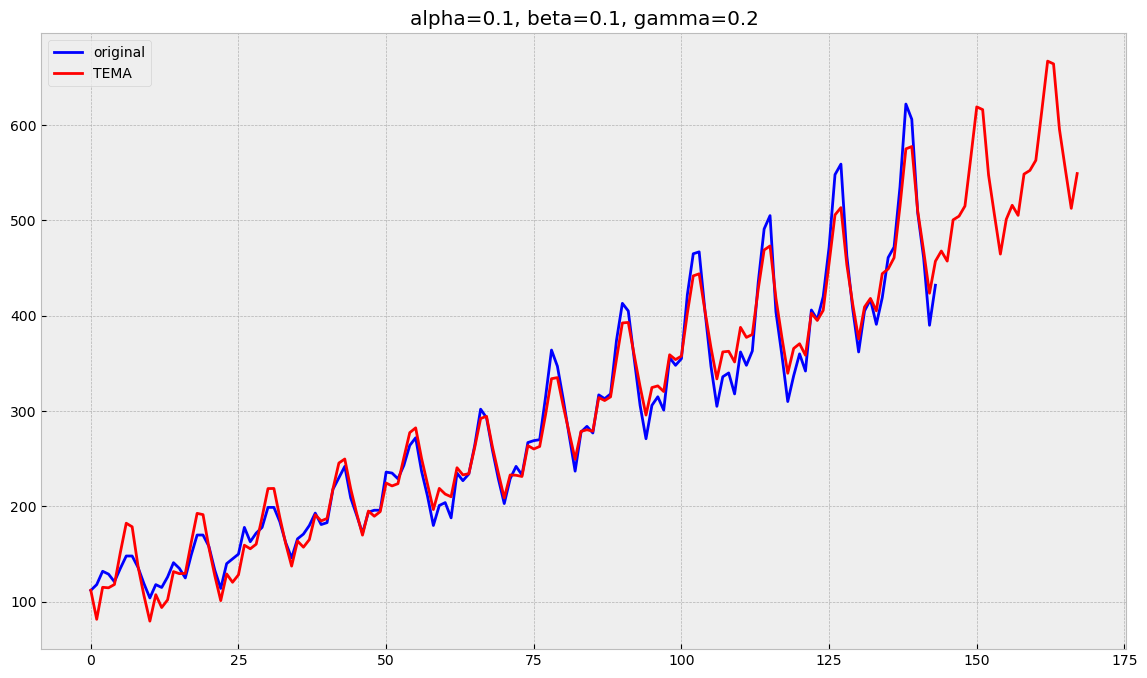

In [7]:
plot_tema(alpha, beta, gamma, data)

In [8]:
print('RMSE –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö —Å–ª—É—á–∞–π–Ω–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha, beta, gamma:',
      np.sqrt(mse_hwm([alpha, beta, gamma], train, test)))

RMSE –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö —Å–ª—É—á–∞–π–Ω–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha, beta, gamma: 35.92591408559796


–ü–æ–¥–±–µ—Ä—ë–º –æ—Ç–ø–∏–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha, beta, gamma

In [9]:
opt = minimize(mse_hwm, x0=[0,0,0], args=(train, test), method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [10]:
alpha_opt, beta_opt, gamma_opt = opt.x

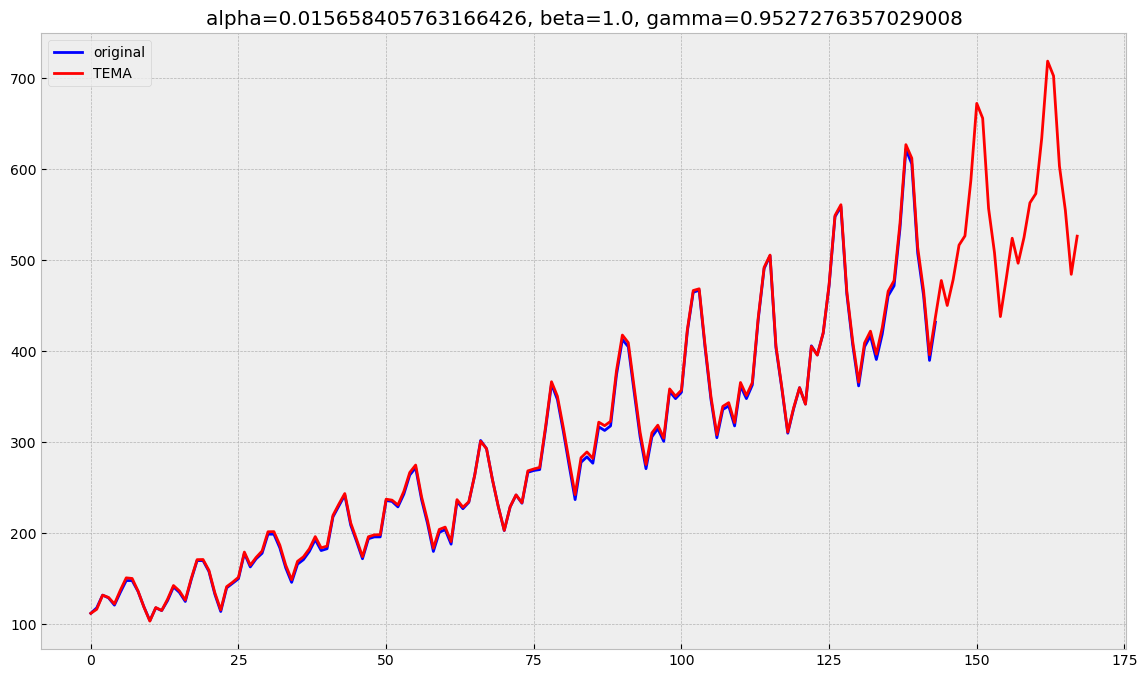

In [11]:
plot_tema(alpha_opt, beta_opt, gamma_opt, data)

In [12]:
print('RMSE –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha, beta, gamma –¥–ª—è –º–µ—Ç–æ–¥–∞ –•–æ–ª—å—Ç-–í–∏–Ω—Ç–µ—Ä—Å–∞:',
      np.sqrt(mse_hwm([alpha_opt, beta_opt, gamma_opt], train, test)))

RMSE –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha, beta, gamma –¥–ª—è –º–µ—Ç–æ–¥–∞ –•–æ–ª—å—Ç-–í–∏–Ω—Ç–µ—Ä—Å–∞: 21.959945572453595


**–í—ã–≤–æ–¥:** –£–¥–∞–ª–æ—Å—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ –ø–æ–¥–æ–±—Ä–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –º–µ—Ç–æ–¥–∞ —Ç—Ä–æ–π–Ω–æ–≥–æ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –∏ –¥–æ–±–∏—Ç—å—Å—è RMSE = 22

### –ü—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–≥–æ —Ä—è–¥–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ Daily total female births in California

In [31]:
data = female_births['Count']

–ü—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ —Å —Ä–∞–∑–º–µ—Ä–æ–º "–æ–∫–Ω–∞" ùëõ = 7

In [32]:
n = 7

In [33]:
ser = moving_average(data, n)

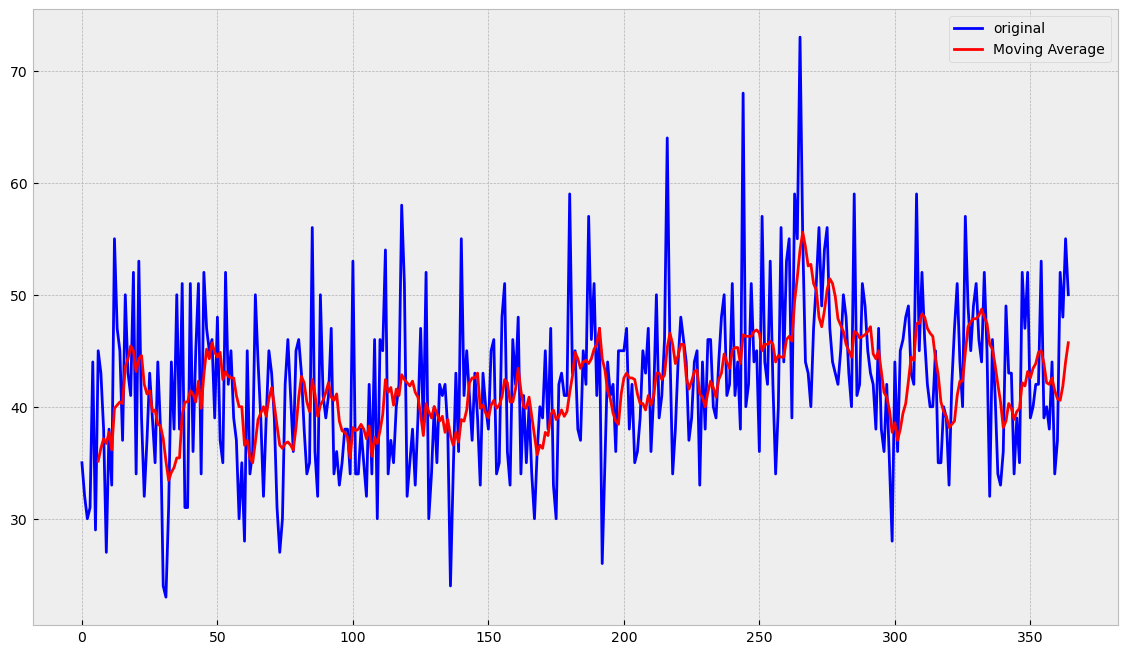

In [34]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(data, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='2', label='Moving Average')
    plt.legend()
    plt.show()

In [35]:
train, test = data[:270], data[270:]

In [36]:
print('RMSE –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –º–µ—Ç–æ–¥–∞ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ:',
      np.sqrt(mse_ma(train, test, n)))

RMSE –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –º–µ—Ç–æ–¥–∞ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ: 7.568463031095628


–ü—Ä–∏–º–µ–Ω–∏–º —Ç–∞–∫–∂–µ –∏ –º–µ—Ç–æ–¥ —ç–∫—Å–ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è(ETA), —á—Ç–æ–±—ã —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–∞–±–æ—Ç—É –º–µ—Ç–æ–¥–æ–≤.

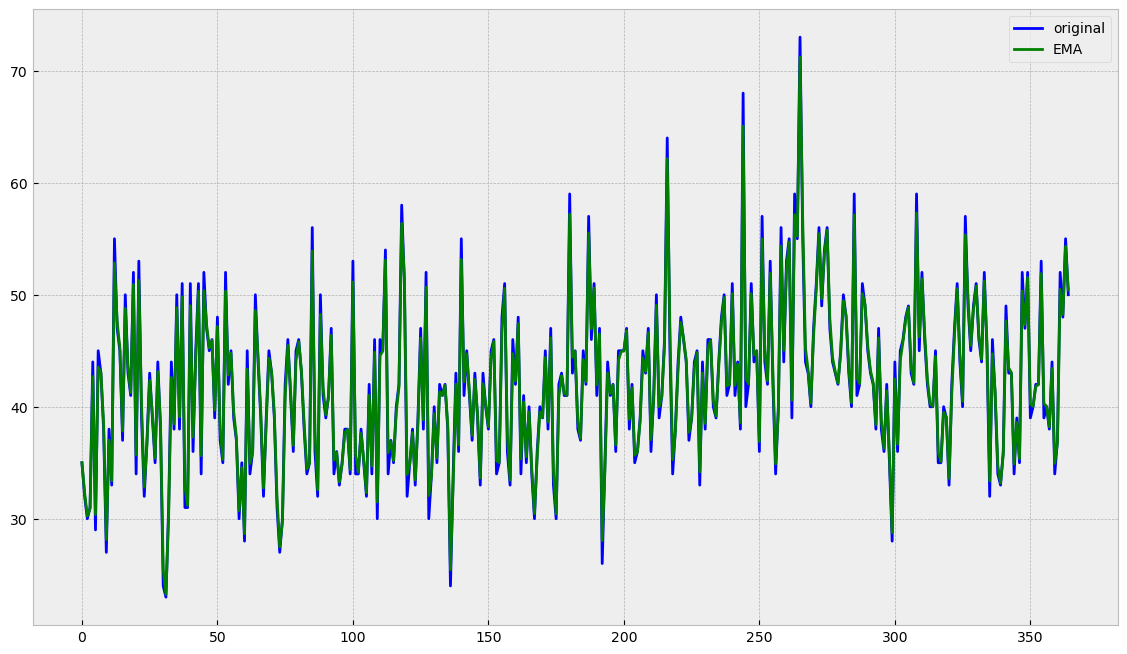

In [37]:
ema = exponential_moving_average(data, 0.9)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(data, color='blue',label='original')
    plt.plot(ema, color='green', linewidth='2', label='EMA')
    plt.legend()
    plt.show()

In [30]:
print('RMSE –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –º–µ—Ç–æ–¥–∞ —ç–∫—Å–ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è:',
      np.sqrt(mse_emv(train, test)))

RMSE –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –º–µ—Ç–æ–¥–∞ —ç–∫—Å–ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è: 9.86125804141042


**–í—ã–≤–æ–¥:** 
- –¥–ª—è –º–µ—Ç–æ–¥–∞ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –¥–ª—è —Ä–∞–∑–º–µ—Ä–∞ "–æ–∫–Ω–∞" 7 –ø–æ–ª—É—á–∏–ª–∏ RMSE = 7.57
- –¥–ª—è –º–µ—Ç–æ–¥–∞ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –ø—Ä–∏ alpha = 0.9 –ø–æ–ª—É—á–∏–ª–∏ RMSE = 9.86

### –í—ã–≤–æ–¥:

–í –ø—Ä–æ–µ–∫—Ç–µ –±—ã–ª–∏ —Ä–∞—Å–º–æ—Ç—Ä–µ–Ω—ã –º–µ—Ç–æ–¥—ã —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ(MA), —ç–∫—Å–ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è(EMA) –∏ —Ç—Ä–æ–π–Ω–æ–≥–æ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è(TEMA) –¥–ª—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–≥–æ –∏ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ. 